### Learning speed (amount of images) for different times and different zones

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
zones = ['III_to_IV', 'III', 'IV', 'I', 'II', 'II_to_III', 'I_to_II', 'IV_to_I', 'IV_alt']
times = range(2,22,2)
accuracies = {}

In [6]:
for zone in zones:
    accuracies[zone] = {}
    for t in times:
        accuracies[zone][t] = []
        data_train = np.load(f'X_train_TN_10000_time_{t}_zone={zone}.npz')
        data_test = np.load(f'X_test_TN_5000_time_{t}_zone={zone}.npz')

        X_train = data_train['x']
        y_train = data_train['y']

        X_test = data_test['x']
        y_test = data_test['y']


        X_train_flat = np.array([sublist for sublist in X_train])
        X_train_flat = X_train_flat.reshape(X_train_flat.shape[0], X_train_flat.shape[1], )

        X_test_flat = np.array([sublist for sublist in X_test])
        X_test_flat = X_test_flat.reshape(X_test_flat.shape[0], X_test_flat.shape[1], )

        scaler = StandardScaler()
        X_train = scaler.fit_transform(np.real(np.array(X_train_flat)))
        X_test = scaler.transform(np.real(np.array(X_test_flat)))

        for i in np.linspace(1000, 10000, 10):
            clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
            clf.fit(X_train[:int(i)], y_train[:int(i)])

            y_class = clf.predict(X_test)
            accuracy = np.sum(y_class == y_test) / len(y_test)
            accuracies[zone][t].append(accuracy)

/home/victor/TFM/simulacion/tp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/victor/TFM/simulacion/tp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/victor/TFM/simulacion/tp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/victor/TFM/simulacion/tp/lib/python3.12/site-packages/sklearn/linear_model/_log

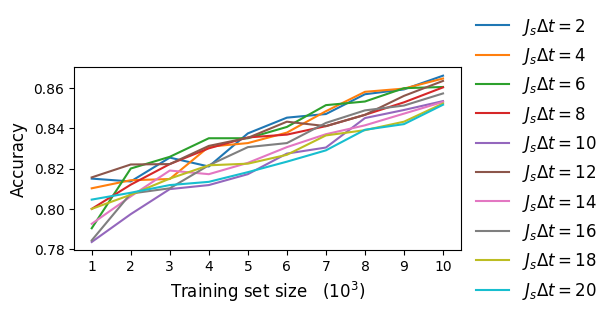

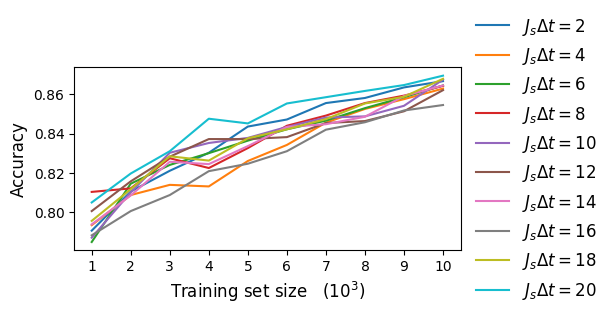

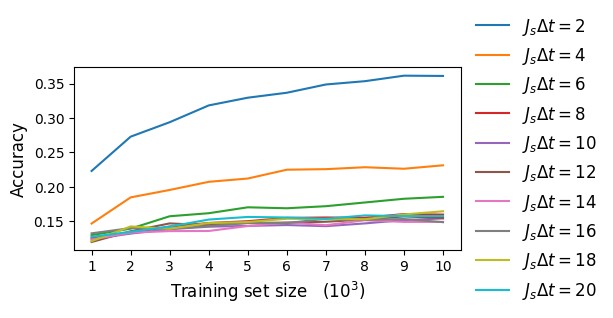

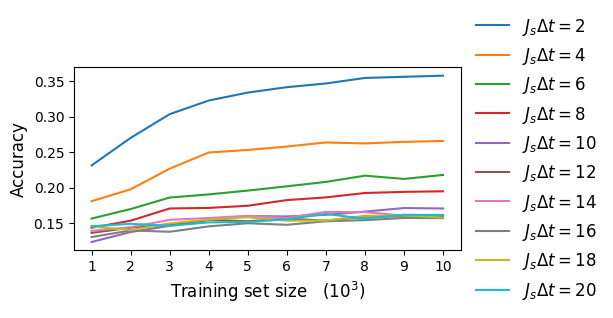

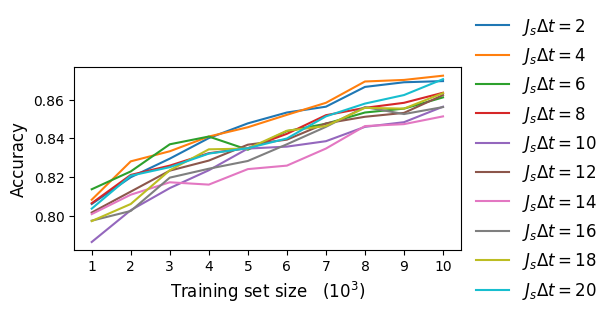

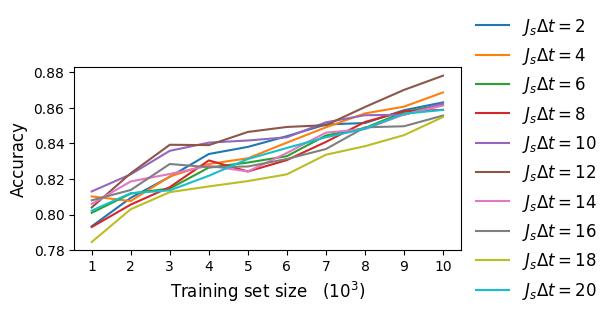

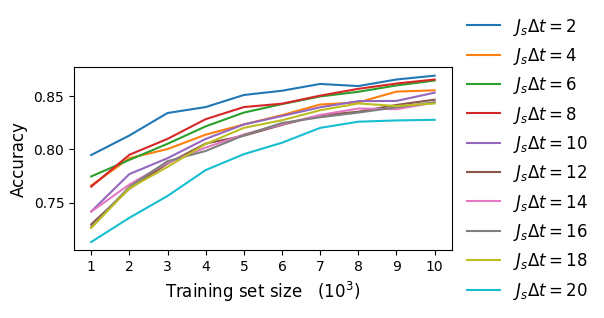

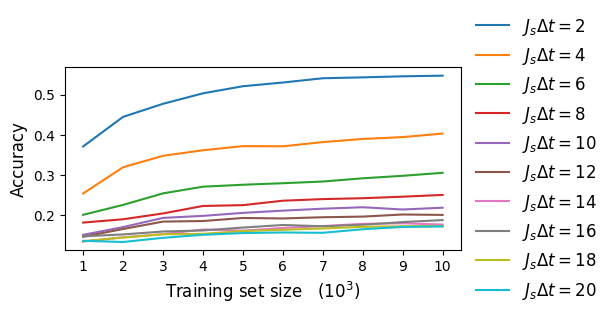

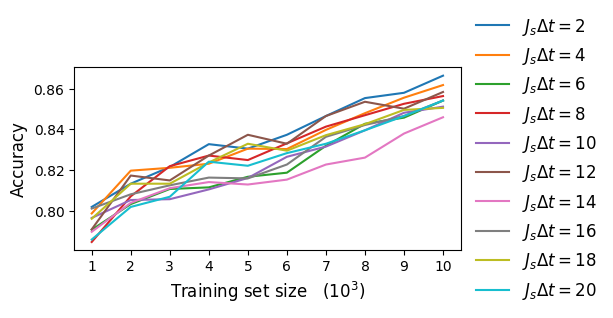

In [18]:
import matplotlib.pyplot as plt
for zone_name in zones:
    plt.figure(figsize=(6, 3))
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][2], label=r'$J_s \Delta t = 2$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][4], label=r'$J_s \Delta t = 4$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][6], label=r'$J_s \Delta t = 6$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][8], label=r'$J_s \Delta t = 8$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][10], label=r'$J_s \Delta t = 10$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][12], label=r'$J_s \Delta t = 12$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][14], label=r'$J_s \Delta t = 14$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][16], label=r'$J_s \Delta t = 16$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][18], label=r'$J_s \Delta t = 18$')
    plt.plot(np.linspace(1, 10, 10), accuracies[f'{zone_name}'][20], label=r'$J_s \Delta t = 20$')
    plt.xlabel(r'$ \text{Training set size} \quad (10^3)$', fontsize=12)
    plt.legend(fontsize=12, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.linspace(1, 10, 10))
    plt.tight_layout()
    plt.ylabel('Accuracy', fontsize=12)
    #plt.show()
    plt.savefig(f'graficas/zone{zone_name}/performance_tsize.png', bbox_inches='tight')
